<a href="https://colab.research.google.com/github/Filburb/Filburb/blob/main/svr%2C%20lstm%2C%20kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
file_path = 'data_balita.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          1
dtype: int64


In [4]:
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

In [8]:
X_reg = data[['Umur (bulan)', 'Jenis Kelamin']]
y_reg = data['Tinggi Badan (cm)']

In [9]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [10]:
svr = SVR()
svr.fit(X_train_reg, y_train_reg)

SVR()

In [11]:
y_pred_svr = svr.predict(X_test_reg)

In [12]:
mse_svr = mean_squared_error(y_test_reg, y_pred_svr)

In [13]:
print("SVR Mean Squared Error:", mse_svr)

SVR Mean Squared Error: 58.332974442493835


In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
X_lstm = np.array(X).reshape((X.shape[0], 1, X.shape[1]))
y_lstm = np.array(y)

In [47]:
onehot_encoder = OneHotEncoder(sparse=False)
y_lstm_oh = onehot_encoder.fit_transform(y_lstm.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm_oh, test_size=0.2, random_state=42)

In [49]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(y_train_lstm.shape[1], activation='softmax'))

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
732/732 [==============================] - 7s 6ms/step - loss: 0.8412 - accuracy: 0.6909 - val_loss: 0.5070 - val_accuracy: 0.8287
Epoch 2/10
732/732 [==============================] - 5s 6ms/step - loss: 0.4027 - accuracy: 0.8739 - val_loss: 0.3457 - val_accuracy: 0.8740
Epoch 3/10
732/732 [==============================] - 3s 4ms/step - loss: 0.2973 - accuracy: 0.8983 - val_loss: 0.2624 - val_accuracy: 0.9366
Epoch 4/10
732/732 [==============================] - 3s 5ms/step - loss: 0.2444 - accuracy: 0.9184 - val_loss: 0.2385 - val_accuracy: 0.9072
Epoch 5/10
732/732 [==============================] - 3s 4ms/step - loss: 0.2164 - accuracy: 0.9290 - val_loss: 0.1887 - val_accuracy: 0.9610
Epoch 6/10
732/732 [==============================] - 2s 3ms/step - loss: 0.1942 - accuracy: 0.9394 - val_loss: 0.1701 - val_accuracy: 0.9692
Epoch 7/10
732/732 [==============================] - 3s 4ms/step - loss: 0.1775 - accuracy: 0.9459 - val_loss: 0.1585 - val_accuracy: 0.9677
Epoch 

In [52]:
y_pred_lstm = model.predict(X_test_lstm)

229/229 [==============================] - 1s 1ms/step


In [53]:
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_test_lstm_classes = np.argmax(y_test_lstm, axis=1)

In [54]:
unique_test_classes = np.unique(y_test_lstm_classes)
unique_pred_classes = np.unique(y_pred_lstm_classes)
print("Unique classes in test set:", unique_test_classes)
print("Unique classes in predictions:", unique_pred_classes)

Unique classes in test set: [0 1 2 3]
Unique classes in predictions: [0 1 2 3]


In [55]:
report_lstm = classification_report(y_test_lstm_classes, y_pred_lstm_classes, target_names=label_encoder.classes_[:len(unique_test_classes)])

In [56]:
print("LSTM Classification Report:\n", report_lstm)

LSTM Classification Report:
                   precision    recall  f1-score   support

          normal       0.97      0.99      0.98      3258
severely stunted       0.96      1.00      0.98      1586
         stunted       0.97      0.82      0.89       689
          tinggi       1.00      0.98      0.99      1778

        accuracy                           0.97      7311
       macro avg       0.97      0.95      0.96      7311
    weighted avg       0.97      0.97      0.97      7311



In [63]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [59]:
clusters = kmeans.labels_

In [60]:
data['Cluster'] = clusters

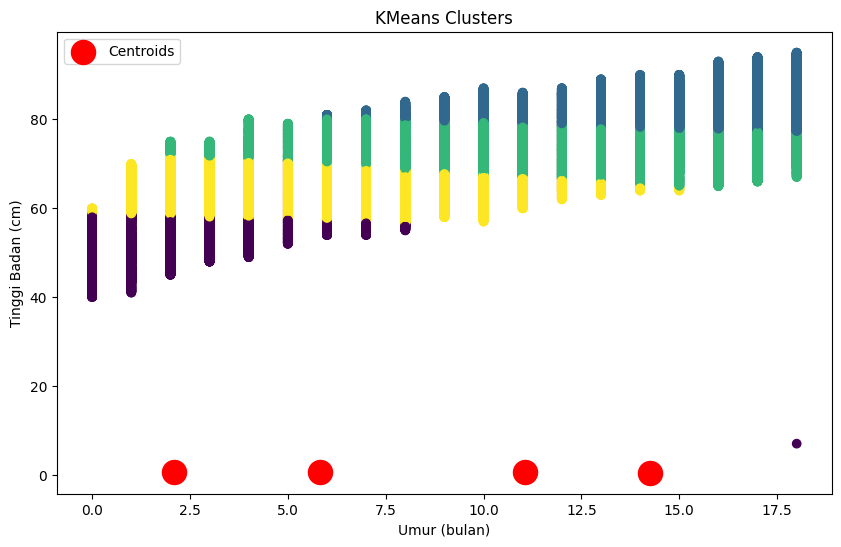

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Umur (bulan)'], X['Tinggi Badan (cm)'], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.title('KMeans Clusters')
plt.legend()
plt.show()

In [61]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 2.1041501   0.51502624 51.77215631]
 [14.24657863  0.45786315 84.09636255]
 [11.05851745  0.51200768 73.11388817]
 [ 5.81806629  0.54092979 63.81613834]]
